<a href="https://colab.research.google.com/github/Prabhjot410/Titanic---Machine-Learning-from-Disaster/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading dataset from kaggle via API's

In [2]:
#install kaggle
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prabhjot132","key":"ddebb2bd321984e8266c52772900784f"}'}

In [4]:
#create a kaggle directory
!mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                             title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                              Data Science Job Salaries                        7KB  2022-06-15 08:59:12          21301        655  1.0              
josephcheng123456/olympic-historical-dataset-from-olympediaorg  Olympic Historical Dataset From Olympedia.org   25MB  2022-08-18 14:18:14            673         27  1.0              
deepcontractor/mcdonalds-india-menu-nutrition-facts             McDonald's India : Menu Nutrition Dataset        5KB  2022-07-28 17:08:52           1741         92  0.9411765        
gpreda/life-expectancy-in-europe-by-age-and-sex                 Life Expectancy in Eu

In [9]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 28.4MB/s]


In [10]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# import libraries


In [11]:
import pandas as pd
from matplotlib import pyplot as plt

In [46]:
from sklearn.tree import DecisionTreeClassifier

# reading the dataset

In [12]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
count = train['Survived'].value_counts()

In [20]:
train.shape

(891, 12)

# EDA

In [22]:
key = train['Survived'].value_counts().keys()

<BarContainer object of 2 artists>

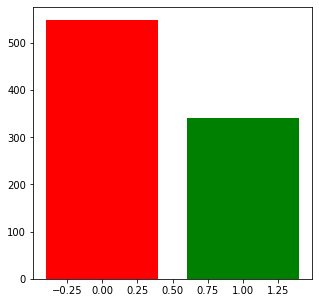

In [28]:
plt.figure(figsize=(5,5))
plt.bar(list(key),list(count),color=['r','g'])

In [29]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

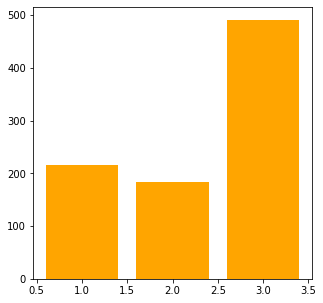

In [34]:
plt.figure(figsize=(5,5))
plt.bar(list(train['Pclass'].value_counts().keys()),list(train['Pclass'].value_counts()),color = 'orange')
plt.show()

In [35]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

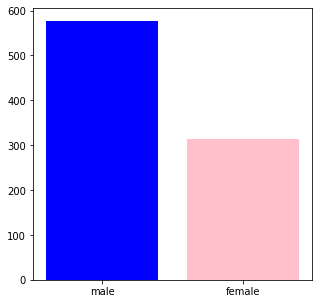

In [36]:
plt.figure(figsize=(5,5))
plt.bar(list(train['Sex'].value_counts().keys()),list(train['Sex'].value_counts()),color=['b','pink'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

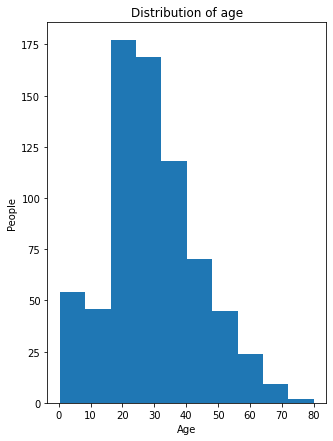

In [39]:
plt.figure(figsize=(5,7))
plt.hist(train['Age'])
plt.title("Distribution of age")
plt.xlabel("Age")
plt.ylabel("People")
plt.show

In [38]:
sum(train['Survived'].isnull())

0

In [40]:
sum(train['Age'].isnull())

177

In [41]:
sum(train['Pclass'].isnull())

0

In [42]:
train = train.dropna()

In [43]:
sum(train['Survived'].isnull())

0

In [44]:
sum(train['Age'].isnull())

0

In [45]:
x_train = train[['Age']]
y_train = train[['Survived']]

In [47]:
dtc = DecisionTreeClassifier()

In [48]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

# Predicting the values

In [51]:
sum(test['Age'].isnull())

0

In [50]:
test = test.dropna()

In [53]:
x_test = test[['Age']]


In [54]:
y_pred = dtc.predict(x_test)

In [55]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])